To Do List:-

- Add to analysis:- 
    CAPM Model 
    Bankruptcy Risks
    Perfect stock allocation of the 30 stocks in a portfolio
    
- Visualization in webapp

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import json
import requests

from functools import reduce

from matplotlib import pyplot as plt

import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

from config import api_token

In [2]:
# Function to return Stock 1yr Prices and Daily Returns

def returns(stock):
    
    base_url = "https://sandbox.iexapis.com/stable/stock/"
    
    # Query link for stock API call (1 Year Data)
    stock_url = base_url + stock + "/chart/5y?token=" + api_token   
    
    # JSON Response for stock data
    iex_stock_response = requests.get(stock_url).json()
    
    # DataFrame for Stock Data
    stock_date = []
    stock_close = []
    stock_returns = []

    # Interate through API Reponse
    for response in iex_stock_response:
        stock_date.append(response["date"])
        stock_close.append(response["close"])
        
    # Built Stock data Dataframe
    stock_data = pd.DataFrame({"Date": stock_date,
                           str(stock): stock_close})
    
    # To add column with daily returns
    stock_return_str = str(stock) + "_" + "log_returns"
    
    # Calculate Daily Returns
    stock_data[stock_return_str] = (np.log(stock_data[str(stock)]) - np.log(stock_data[str(stock)].shift(1)))  
    
    # Return Pandas Dataframe 
    return stock_data.loc[1:]
    

# Test Function
returns("AAPL")
    

,Date,AAPL,AAPL_log_returns
1,2015-03-26,130.25,0.032539
2,2015-03-27,127.47,-0.021575
3,2015-03-30,128.86,0.010846
4,2015-03-31,126.41,-0.019196
5,2015-04-01,129.80,0.026464
...,...,...,...
1254,2020-03-18,249.14,-0.048649
1255,2020-03-19,256.69,0.029854
1256,2020-03-20,239.41,-0.069692
1257,2020-03-23,230.34,-0.038621


In [13]:
# Market Ticker
market = "SPY"

In [14]:
# Create Returns DataFrame for market
market_df = returns(market)

In [15]:
# Input Stock Ticker
stock = input()

TSLA


In [16]:
# Create Returns DataFrame for stock
stock_df = returns(stock)

In [17]:
# Number of trading days in a year
trading_days = 252

In [18]:
# Create DataFrames for for rolling 252 trading days for 5 years


shape = stock_df.shape[0]
shape_list = list(range(shape))
shape_list

dfs_for_stocks = []
dfs_for_market = []

for x in shape_list:
    
    stock_ranges_values = []
    market_ranges_values = []
    # Loop through rows of dataframe by index i.e. from 0 to number of rows
    for i in range(x, x + trading_days):
        try:
           # get row contents as series using iloc{] and index position of row
            rowSeries_stock = stock_df.iloc[i]
            rowSeries_market = market_df.iloc[i]
           # print row contents
            stock_ranges_values.append(rowSeries_stock.values)
            market_ranges_values.append(rowSeries_market.values)
        
        except:
            pass
    
    if len(stock_ranges_values) < 252:
        pass
    else:    
        dfs_for_stocks.append(stock_ranges_values)
        dfs_for_market.append(market_ranges_values)

In [21]:
# View a DataFrame in the dfs_for_stocks list
stock_dfs_preview = pd.DataFrame(dfs_for_stocks[0])
stock_dfs_preview


,0,1,2
0,2015-03-26,196.58,0.009096
1,2015-03-27,187.00,-0.049961
2,2015-03-30,196.64,0.050266
3,2015-03-31,196.14,-0.002546
4,2015-04-01,189.60,-0.033912
...,...,...,...
247,2016-03-18,241.14,0.036100
248,2016-03-21,240.30,-0.003490
249,2016-03-22,237.89,-0.010080
250,2016-03-23,223.06,-0.064368


In [22]:
# View a DataFrame in the dfs_for_market list
market_dfs_preview = pd.DataFrame(dfs_for_market[1006])
market_dfs_preview

,0,1,2
0,2019-03-26,284.37,-0.012302
1,2019-03-27,291.23,0.023837
2,2019-03-28,282.77,-0.029479
3,2019-03-29,292.53,0.033933
4,2019-04-01,288.98,-0.012210
...,...,...,...
247,2020-03-18,251.00,-0.008727
248,2020-03-19,244.29,-0.027097
249,2020-03-20,232.50,-0.049466
250,2020-03-23,228.44,-0.017617


In [23]:
# Create lists of statistics for each time frame

df_number = list(range(len(dfs_for_stocks)))
df_number

means = []
variances = []
standard_deviations = []
annual_sds = []
covariances = []
betas = []
coefficients = []
systematic_risks = []
unsystematic_risks = []

for i in df_number:
    
    # Assign dataframe to variables
    panda_stocks = pd.DataFrame(dfs_for_stocks[i])
    panda_market = pd.DataFrame(dfs_for_market[i])
    
    # Variable for list of market returns
    market_returns = panda_market[2]
    
    # Calculate Market Variance
    market_variance = market_returns.var()
    
    # Calculate Stock Returns Mean
    mean = panda_stocks[2].mean()
    means.append(mean)
    
    # Calculate Stock Returns Variance
    var = panda_stocks[2].var()
    variances.append(var)

    # Calculate Stock Returns Standard Deviations
    sd = math.sqrt(var)
    standard_deviations.append(sd) 

    # Calculate Annualized Standard Deviations
    sd_annual = sd * math.sqrt(len(panda_stocks[2]))
    annual_sds.append(sd_annual)

    # Calculate Covariance
    covars = np.cov(panda_stocks[2], market_returns, ddof=1)[0][1]
    covariances.append(covars)

    # Beta = Covariance / Market Variance 
    beta = covars / market_variance
    betas.append(round(beta, 3))

    #Calculate Correlation Coefficients
    corr_coef = np.corrcoef(panda_stocks[2], market_returns, ddof=1)[0][1]
    coefficients.append(round(corr_coef, 3))

    # Total Risk
    total_risk = var

    # Calculate Systematic Risk
    systematic = ((np.square(beta) * market_variance) / total_risk) * 100
    systematic_risks.append(round(systematic, 3))

    # Calculate Systematic Risk
    unsystematic = 100 - systematic
    unsystematic_risks.append(round(unsystematic, 3))
    


C:\Users\deepe\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: bias and ddof have no effect and are deprecated


In [24]:
# Set x axis and variables
x_axis = np.arange(0, len(systematic_risks))
sys = systematic_risks
unsys = unsystematic_risks


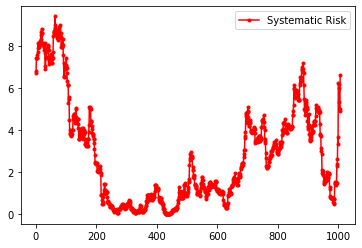

In [25]:
# Graph of Daily Systematic Risk using daily returns over past 5 years
# Each point on the systematic chart is marked by a blue circle
sys_handle, = plt.plot(x_axis, sys, marker ='.', color='red', label="Systematic Risk")

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

plt.show()

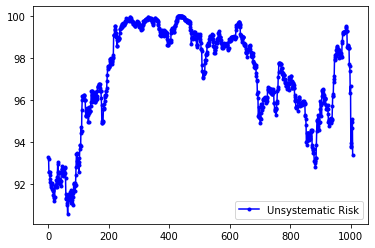

In [26]:
# Graph of Daily UnSystematic Risk using daily returns over past 5 years
# Each point on the unsystematic chart is marked by a red triangle
unsys_handle, = plt.plot(x_axis, unsys, marker='.', color='blue', label="Unsystematic Risk")

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

plt.show()